In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

In [35]:
ds = pd.read_csv("/content/BostonHousing.csv")

In [4]:
ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
ds.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
ds.shape


(506, 14)

In [8]:
ds.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
ds.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [10]:
correlation = ds.corr()

<Axes: >

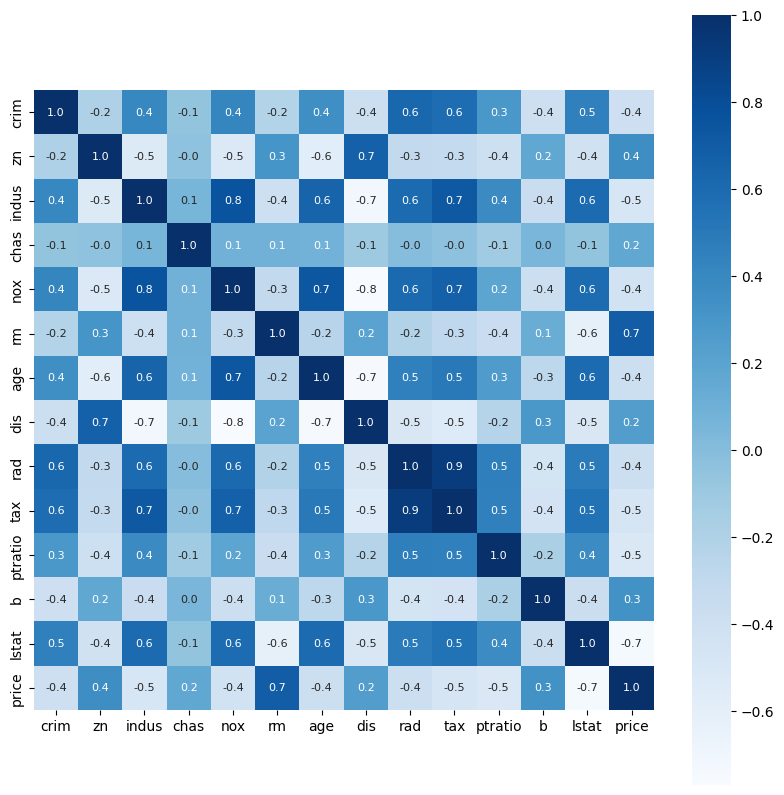

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
x = ds.drop('price', axis=1)
y = ds['price']

In [15]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [16]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [18]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.25, random_state=32)

In [21]:
print(x.shape, x_train.shape,x_test.shape)

(506, 13) (379, 13) (127, 13)


In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train, y_train)

LinearRegression()

In [25]:
model.prediction = model.predict(x_train)

In [26]:
model.prediction

array([24.6463986 , 19.80523554, 18.6276367 , 13.37207787, 29.42906756,
       11.09854133, 14.28346301,  9.37496663, 17.49232385, 28.65771211,
       18.97674362, 15.36417784, 32.23828285, 18.9308945 , 22.49117149,
       36.36451929,  6.76611163, 16.58354507,  2.71730204, 19.87160503,
       18.22278886, 22.27549205,  7.34655106, 18.79674328, 20.95066009,
       20.13584074, 23.04830015, 22.51234945, 21.36002511, 27.2150795 ,
       25.4551339 , 33.63346041, 20.94051464, 18.38496006, 17.1801357 ,
       33.54258994, 22.19701978, 19.35865655, 23.76674453, 40.00693137,
       25.25490612, 13.78940925, 30.99770866, 18.18018879, 16.95272371,
       17.73579311, 22.50815836, 11.80553554, 27.74950112, 15.83467652,
       16.51751244, 25.29288777, 14.21870673, 35.30542844, 12.99432307,
       24.29171281, 19.12645357, 32.38894648, 23.37739109, 38.9375607 ,
       33.04492561, 24.06987923, 34.12734975, 28.60314071, 11.98089169,
       28.50653113, 17.18665551, 22.90224967, 20.42612669, 19.25

In [31]:
score1 = metrics.r2_score(y_train, model.prediction)
print("R2 score : ", score1)

R2 score :  0.7474052219890243


In [32]:
score2 = metrics.mean_absolute_error(y_train, model.prediction)
print("Mean Absolute Error : ", score2)

Mean Absolute Error :  3.206064221675406


In [36]:
model2 = XGBRegressor()

In [37]:
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
model_prediction = model2.predict(x_train)

In [39]:
score1 = metrics.r2_score(y_train, model.prediction)
print("R2 score : ", score1)

R2 score :  0.7474052219890243


In [40]:
score2 = metrics.mean_absolute_error(y_train, model.prediction)
print("Mean Absolute Error : ", score2)

Mean Absolute Error :  3.206064221675406


In [44]:
input = np.array([[0.02731,	0.0,	7.07,	0,	0.469	,6.421,	78.9,	4.9671,	2	,242	,17.8	,396.90,	9.14 ]])
model2.predict(input)


array([21.603535], dtype=float32)

In [47]:
import pickle
pickle.dump(model, open('house_price_prediction.pkl', 'wb') )